##Data Clean

In [ ]:
# Importing some libraries we're going to need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from pandas.plotting import scatter_matrix

In [ ]:
# Looking at what files we've got and getting their paths
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
results = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/results.csv')
driver_standings = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv')
constructor_standings = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv')

FileNotFoundError: ignored

In [ ]:
circuits = pd.read_csv('/content/drive/MyDrive/f1db_csvfinal/circuits.csv', encoding='utf-8',usecols=[0,1]) #meta data just for name wirth help of race id
constructor_results = pd.read_csv('/content/drive/MyDrive/f1db_csvfinal/constructor_results.csv', encoding='utf-8',usecols=[0,1])
constructor_stding = pd.read_csv('/content/drive/MyDrive/f1db_csvfinal/constructor_standings.csv', encoding='utf-8',usecols=[2,1,3,4,6])
drivers = pd.read_csv('/content/drive/MyDrive/f1db_csvfinal/drivers.csv', encoding='utf-8',usecols=[0,2,4]) #meta data just for name left joint with help of drive id
driver_standings = pd.read_csv('/content/drive/MyDrive/f1db_csvfinal/driver_standings.csv', encoding='utf-8',usecols=[0,1,2,3,4])
lap_times = pd.read_csv('/content/drive/MyDrive/f1db_csvfinal/lap_times.csv', encoding='utf-8',usecols=[0,1,2,5]) # fro lap time joined done
pit_stops = pd.read_csv('/content/drive/MyDrive/f1db_csvfinal/pit_stops.csv', encoding='utf-8',usecols=[0,1,2,3,6]) # fro put time joined done
races = pd.read_csv('/content/drive/MyDrive/f1db_csvfinal/races.csv', encoding='utf-8',usecols=[0,1,3,4]) # metadad rce name and year left join with help of race id
results=pd.read_csv('/content/drive/MyDrive/f1db_csvfinal/results.csv', encoding='utf-8',usecols=[0,1,2,3,5,6,12,14]) # joined  pending



In [ ]:
lap_pit = pd.merge(lap_times, pit_stops, on=['raceId', 'driverId', 'lap'], how='left')

lap_pit.columns = np.where(lap_pit.columns == 'milliseconds_x', 'lap_time', lap_pit.columns)
lap_pit.columns = np.where(lap_pit.columns == 'milliseconds_y', 'pitstop_time', lap_pit.columns)
lap_pit.head()

,raceId,driverId,lap,lap_time,stop,pitstop_time
0,841,20,1,98109,NaN,NaN
1,841,20,2,93006,NaN,NaN
2,841,20,3,92713,NaN,NaN
3,841,20,4,92803,NaN,NaN
4,841,20,5,92342,NaN,NaN


In [ ]:
print(results.shape)
print(lap_pit.shape)

(26280, 7)
(562507, 6)


In [ ]:
reslut_lap_pit = pd.merge(results,lap_times, on=['raceId', 'driverId'], how='right')
reslut_lap_pit.head()

,resultId,raceId,driverId,constructorId,grid,position,rank,lap,milliseconds
0,20779,841,20,9,1,1,4,1,98109
1,20779,841,20,9,1,1,4,2,93006
2,20779,841,20,9,1,1,4,3,92713
3,20779,841,20,9,1,1,4,4,92803
4,20779,841,20,9,1,1,4,5,92342


In [ ]:
print(reslut_lap_pit.shape)

(562507, 11)


In [ ]:
race_reslut_lap_pit = pd.merge(results,races, on=['raceId'], how='left')
race_reslut_lap_pit.head()

,resultId,raceId,driverId,constructorId,grid,position,milliseconds,rank,year,circuitId,name
0,1,18,1,1,1,1,5690616,2,2008,1,Australian Grand Prix
1,2,18,2,2,5,2,5696094,3,2008,1,Australian Grand Prix
2,3,18,3,3,7,3,5698779,5,2008,1,Australian Grand Prix
3,4,18,4,4,11,4,5707797,7,2008,1,Australian Grand Prix
4,5,18,5,1,3,5,5708630,1,2008,1,Australian Grand Prix


In [ ]:
driver_race_reslut_lap_pit = pd.merge(race_reslut_lap_pit,drivers, on=['driverId'], how='left')
driver_race_reslut_lap_pit.head()


,resultId,raceId,driverId,constructorId,grid,position,milliseconds,rank,year,circuitId,name,number,forename
0,1,18,1,1,1,1,5690616,2,2008,1,Australian Grand Prix,44,Lewis
1,2,18,2,2,5,2,5696094,3,2008,1,Australian Grand Prix,\N,Nick
2,3,18,3,3,7,3,5698779,5,2008,1,Australian Grand Prix,6,Nico
3,4,18,4,4,11,4,5707797,7,2008,1,Australian Grand Prix,14,Fernando
4,5,18,5,1,3,5,5708630,1,2008,1,Australian Grand Prix,\N,Heikki


In [ ]:
circuits.head()

,circuitId,circuitRef
0,1,albert_park
1,2,sepang
2,3,bahrain
3,4,catalunya
4,5,istanbul


In [ ]:
circuit_driver_race_reslut_lap_pit = pd.merge(driver_race_reslut_lap_pit,circuits, on=['circuitId'], how='left')
circuit_driver_race_reslut_lap_pit.head()

,resultId,raceId,driverId,constructorId,grid,position,milliseconds,rank,year,circuitId,name,number,forename,circuitRef
0,1,18,1,1,1,1,5690616,2,2008,1,Australian Grand Prix,44,Lewis,albert_park
1,2,18,2,2,5,2,5696094,3,2008,1,Australian Grand Prix,\N,Nick,albert_park
2,3,18,3,3,7,3,5698779,5,2008,1,Australian Grand Prix,6,Nico,albert_park
3,4,18,4,4,11,4,5707797,7,2008,1,Australian Grand Prix,14,Fernando,albert_park
4,5,18,5,1,3,5,5708630,1,2008,1,Australian Grand Prix,\N,Heikki,albert_park


In [ ]:
circuit_driver_race_reslut_lap_pit.shape

(26280, 14)

In [ ]:
2023-7

2016

In [ ]:
type(circuit_driver_race_reslut_lap_pit)

pandas.core.frame.DataFrame

In [ ]:
df_after_2015 = circuit_driver_race_reslut_lap_pit[circuit_driver_race_reslut_lap_pit['year'] >= 2015]
df_after_2015.replace('\\N', np.nan, inplace=True)  # Replace '\\N' with NaN
df_after_2015.dropna(inplace=True)

<ipython-input-141-00cb8efbc28b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2015.replace('\\N', np.nan, inplace=True)  # Replace '\\N' with NaN
<ipython-input-141-00cb8efbc28b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2015.dropna(inplace=True)


In [ ]:
df_after_2015.shape

(1917, 14)

In [ ]:
df_after_2015.to_csv('final_f1_database_sata_proj.csv', index=False)

In [ ]:
is_N_present = ( df_after_2015== '\\N').any().any()

if is_N_present:
    print("The string '\\N' is present somewhere in the DataFrame.")
else:
    print("The string '\\N' is not present in the DataFrame.")

The string '\N' is not present in the DataFrame.


In [ ]:
df_after_2015['position'].replace('\\N', np.nan, inplace=True)  # Replace '\\N' with NaN in the 'position' column
df_after_2015.dropna(subset=['position'], inplace=True)


<ipython-input-132-66a9d37b8bc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2015['position'].replace('\\N', np.nan, inplace=True)  # Replace '\\N' with NaN in the 'position' column
<ipython-input-132-66a9d37b8bc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2015.dropna(subset=['position'], inplace=True)


In [ ]:
is_N_present = ( df_after_2015== '\\N').any().any()

if is_N_present:
    print("The string '\\N' is present somewhere in the DataFrame.")
else:
    print("The string '\\N' is not present in the DataFrame.")

The string '\N' is not present in the DataFrame.


In [ ]:
df_after_2015.shape

(3147, 14)

In [ ]:
df = pd.DataFrame(circuit_driver_race_reslut_lap_pit)
# Assuming 'df' is your DataFrame


# Now, 'df' contains no rows with '\\N' values
df.to_csv('final_f1_database_sata_proj.csv', index=False)

In [ ]:
df.shape

(26280, 14)

In [ ]:
circuit_driver_race_reslut_lap_pit.tail()

,resultId,raceId,driverId,constructorId,grid,position,rank,year,circuitId,name,number,forename,circuitRef
26275,26281,1120,858,3,20,16,12,2023,24,Abu Dhabi Grand Prix,2,Logan,yas_marina
26276,26282,1120,855,51,19,17,13,2023,24,Abu Dhabi Grand Prix,24,Guanyu,yas_marina
26277,26283,1120,832,6,16,18,17,2023,24,Abu Dhabi Grand Prix,55,Carlos,yas_marina
26278,26284,1120,822,51,18,19,18,2023,24,Abu Dhabi Grand Prix,77,Valtteri,yas_marina
26279,26285,1120,825,210,17,20,19,2023,24,Abu Dhabi Grand Prix,20,Kevin,yas_marina


In [ ]:
#(receid driverid constructorid grid curcitid rank?)train  input-> (postion) predict output
#meta data is year name forename number circuitRef
#  resultid

In [ ]:
8-13

-5

In [ ]:
df.replace('\\N', 0, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# Assuming your DataFrame is named 'df'
X = df_after_2015.drop(['resultId','position','year','circuitRef',"name","number","forename"	,"circuitRef"], axis=1)
y = df_after_2015['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f'Linear Regression Mean Absolute Error: {mae}')
rmse = np.sqrt(mae)
print(rmse)
r2 = r2_score(y_test, predictions)
print(r2)

Linear Regression Mean Absolute Error: 1.9560526960569629
1.3985895380907734
0.5349676771689906


In [ ]:
print(X_test.columns)

Index(['raceId', 'driverId', 'constructorId', 'grid', 'milliseconds', 'rank',
       'circuitId'],
      dtype='object')


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
93*50*60

279000

In [ ]:
new_instance = [[926, 1, 131, 1, 5514067, 1, 1]]
single_instance = pd.DataFrame([[1121, 822, 3, 12, 5514067, 19, 1]], columns=X.columns)


In [ ]:
model.predict(single_instance)

array([12.36469344])

In [ ]:
X.head()

,raceId,driverId,constructorId,grid,milliseconds,rank,circuitId
22534,926,1,131,1,5514067,1,1
22535,926,3,131,2,5515427,2,1
22536,926,20,6,4,5548590,4,1
22537,926,13,3,3,5552263,6,1
22538,926,831,15,10,5609216,9,1


In [ ]:
y.head()

22534    1
22535    2
22536    3
22537    4
22538    5
Name: position, dtype: object

In [ ]:
new_instances = X_test.head()  # Replace this with your actual new data
new_instances=X_
# Predict using the model
predictions = model.predict(new_instances)

# Display the predictions
print('Predicted Positions:')
print(predictions)

Predicted Positions:
[2.53206943 4.07127507 1.58224929 8.85173048 2.10819431]


In [ ]:
type(X.iloc[0])

pandas.core.series.Series

###Model

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/final_f1_database_sata_proj (8).csv', encoding='utf-8')

In [ ]:
X = df.drop(['resultId','position','year','circuitRef',"name","number","forename"	,"circuitRef"], axis=1)
y = df['position']

In [ ]:
Predict2024 = pd.DataFrame([[1121, 822, 3, 12, 5514067, 19, 1]], columns=X.columns)


In [ ]:
Predict2024 = pd.DataFrame([[1121, 830, 9, 1, 5514067, 1, 3],
                            [1121, 815, 9, 2, 5514067, 2, 3],
                            [1121, 1, 131, 8, 5514067, 10, 3],
                            [1121, 847, 131, 6, 5514067, 7, 3],
                            [1121, 844, 6, 4, 5514067, 8, 3],
                            [1121, 832, 6, 9, 5514067, 17, 3],
                            [1121, 852, 213, 15, 5514067, 16, 3],
                            [1121, 817, 213, 13, 5514067, 11, 3]], columns=X.columns)

In [ ]:
Predict2024

,raceId,driverId,constructorId,grid,milliseconds,rank,circuitId
0,1121,830,9,1,5514067,1,3
1,1121,815,9,2,5514067,2,3
2,1121,1,131,8,5514067,10,3
3,1121,847,131,6,5514067,7,3
4,1121,844,6,4,5514067,8,3
5,1121,832,6,9,5514067,17,3
6,1121,852,213,15,5514067,16,3
7,1121,817,213,13,5514067,11,3


In [ ]:
X.head()

,raceId,driverId,constructorId,grid,milliseconds,rank,circuitId
0,926,1,131,1,5514067,1,1
1,926,3,131,2,5515427,2,1
2,926,20,6,4,5548590,4,1
3,926,13,3,3,5552263,6,1
4,926,831,15,10,5609216,9,1


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit SVR model
model = SVR(kernel='linear')  # Radial Basis Function (RBF) kernel is commonly used
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
print(f'Support Vector Regression Mean Absolute Error: {mae}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Support Vector Regression Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'Support Vector Regression R^2 Score: {r2}')

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming your DataFrame is named 'df'
X = df.drop(['resultId', 'position', 'year', 'circuitRef', "name", "number", "forename", "circuitRef"], axis=1)
y = df['position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR model
model = SVR(kernel='linear')

# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
print(f'Support Vector Regression Mean Absolute Error: {mae}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Support Vector Regression Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'Support Vector Regression R^2 Score: {r2}')

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Make predictions with the best model
best_predictions = best_model.predict(X_test_scaled)

# Calculate metrics for the best model
best_mae = mean_absolute_error(y_test, best_predictions)
print(f'Best SVR Mean Absolute Error: {best_mae}')

best_rmse = np.sqrt(mean_squared_error(y_test, best_predictions))
print(f'Best SVR Root Mean Squared Error: {best_rmse}')

best_r2 = r2_score(y_test, best_predictions)
print(f'Best SVR R^2 Score: {best_r2}')


Support Vector Regression Mean Absolute Error: 1.926956703999546
Support Vector Regression Root Mean Squared Error: 2.744501548476897
Support Vector Regression R^2 Score: 0.5202788235553915
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best SVR Mean Absolute Error: 1.8165369971932674
Best SVR Root Mean Squared Error: 2.59469443900885
Best SVR R^2 Score: 0.5712201462261933


##Predictions

In [ ]:
path="/content/final_f1_database_sata_proj (8).csv"

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv(path, encoding='utf-8')

In [ ]:
df.head()

,resultId,raceId,driverId,constructorId,grid,position,milliseconds,rank,year,circuitId,name,number,forename,circuitRef
0,22538,926,1,131,1,1,5514067,1,2015,1,Australian Grand Prix,44,Lewis,albert_park
1,22539,926,3,131,2,2,5515427,2,2015,1,Australian Grand Prix,6,Nico,albert_park
2,22540,926,20,6,4,3,5548590,4,2015,1,Australian Grand Prix,5,Sebastian,albert_park
3,22541,926,13,3,3,4,5552263,6,2015,1,Australian Grand Prix,19,Felipe,albert_park
4,22542,926,831,15,10,5,5609216,9,2015,1,Australian Grand Prix,12,Felipe,albert_park


In [ ]:
X = df.drop(['resultId','position','year','circuitRef',"name","number","forename"	,"circuitRef"], axis=1)
y = df['position']

In [ ]:
X.head()

,raceId,driverId,constructorId,grid,milliseconds,rank,circuitId
0,926,1,131,1,5514067,1,1
1,926,3,131,2,5515427,2,1
2,926,20,6,4,5548590,4,1
3,926,13,3,3,5552263,6,1
4,926,831,15,10,5609216,9,1


from matplotlib import pyplot as plt
_df_0['driverId'].plot(kind='hist', bins=20, title='driverId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['constructorId'].plot(kind='hist', bins=20, title='constructorId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['grid'].plot(kind='hist', bins=20, title='grid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['milliseconds'].plot(kind='hist', bins=20, title='milliseconds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='driverId', y='constructorId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='constructorId', y='grid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='grid', y='milliseconds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='milliseconds', y='rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['raceId']
  ys = series['driverId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('raceId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('raceId')
_ = plt.ylabel('driverId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['raceId']
  ys = series['constructorId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('raceId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('raceId')
_ = plt.ylabel('constructorId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['raceId']
  ys = series['grid']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('raceId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('raceId')
_ = plt.ylabel('grid')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['raceId']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'raceId'}, axis=1)
              .sort_values('raceId', ascending=True))
  xs = counted['raceId']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('raceId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('raceId')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['driverId'].plot(kind='line', figsize=(8, 4), title='driverId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['constructorId'].plot(kind='line', figsize=(8, 4), title='constructorId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['grid'].plot(kind='line', figsize=(8, 4), title='grid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['milliseconds'].plot(kind='line', figsize=(8, 4), title='milliseconds')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
Predict2024 = pd.DataFrame([[1121, 830, 9, 1, 5514067, 1, 80],
                            [1121, 815, 9, 4, 5614067, 2, 80],
                            [1121, 1, 131, 6, 5414067, 10, 80],
                            [1121, 847, 131, 7, 5314067, 7, 80],
                            [1121, 844, 6, 2, 4714067, 8, 80],
                            [1121, 832, 6, 5, 5114067, 17, 80],
                            [1121, 852, 213, 15, 5914067, 16, 80],
                            [1121, 817, 213, 13,5414067, 11, 80]], columns=X.columns)

In [ ]:
Predict2024_3 = pd.DataFrame([[1121, 830, 9, 1, 5514067, 1, 3],
                            [1121, 815, 9, 4, 5614067, 2, 3],
                            [1121, 1, 131, 6, 5414067, 10, 3],
                            [1121, 847, 131, 7, 5314067, 7, 3],
                            [1121, 844, 6, 2, 4714067, 8, 3],
                            [1121, 832, 6, 5, 5114067, 17, 3],
                            [1121, 852, 213, 15, 5914067, 16, 3],
                            [1121, 817, 213, 13,5414067, 11, 3]], columns=X.columns)

In [ ]:
Predict2024

,raceId,driverId,constructorId,grid,milliseconds,rank,circuitId
0,1121,830,9,1,5514067,1,3
1,1121,815,9,2,5514067,2,3
2,1121,1,131,8,5514067,10,3
3,1121,847,131,6,5514067,7,3
4,1121,844,6,4,5514067,8,3
5,1121,832,6,9,5514067,17,3
6,1121,852,213,15,5514067,16,3
7,1121,817,213,13,5514067,11,3


In [ ]:
X.head()

,raceId,driverId,constructorId,grid,milliseconds,rank,circuitId
0,926,1,131,1,5514067,1,1
1,926,3,131,2,5515427,2,1
2,926,20,6,4,5548590,4,1
3,926,13,3,3,5552263,6,1
4,926,831,15,10,5609216,9,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Assuming your DataFrame is named 'df'
X = df.drop(['resultId','position','year','circuitRef',"name","number","forename"	,"circuitRef"], axis=1)
y = df['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

modellr = LinearRegression()
modellr.fit(X_train, y_train)

predictions = modellr.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f'Linear Regression Mean Absolute Error: {mae}')
rmse = np.sqrt(mae)
print(rmse)
r2 = r2_score(y_test, predictions)
print(r2)

Linear Regression Mean Absolute Error: 1.9560526960569626
1.3985895380907734
0.5349676771689906


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Assuming your DataFrame is named 'df'
X = df.drop(['resultId', 'position', 'year', 'circuitRef', "name", "number", "forename", "circuitRef"], axis=1)
y = df['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modellr = LinearRegression()
modellr.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = modellr.coef_
intercept = modellr.intercept_

# Print the equation
equation = f'Linear Regression Equation: y = {intercept:.2f} '
for i, coef in enumerate(coefficients):
    equation += f'+ ({coef:} * X{i+1}) '

print(equation)

predictions = modellr.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f'Linear Regression Mean Absolute Error: {mae}')

r2 = r2_score(y_test, predictions)
print(f'Linear Regression R^2 Score: {r2}')


Linear Regression Equation: y = -3.27 + (0.004526031637268779 * X1) + (0.0006961757625142864 * X2) + (0.0035575708096485343 * X3) + (0.34940529558169764 * X4) + (-1.3284679164647824e-07 * X5) + (0.34307431891059503 * X6) + (-0.002618159250708658 * X7) 
Linear Regression Mean Absolute Error: 1.9560526960569626
Linear Regression R^2 Score: 0.5349676771689906


In [ ]:
x.c

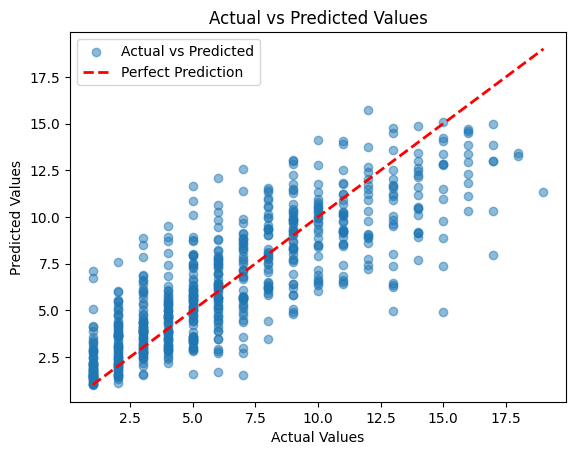

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, predictions)
line = slope * y_test + intercept



# Confidence interval (this is a simple way to calculate it, for illustration purposes)
ci = 1.96 * std_err

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
predictlr=modellr.predict(Predict2024)
driver_name=["Max","Perez","Ham","Russ","Lec","Saiz","yuki","Ric"]
results = zip(driver_name, predictlr)

# Iterate through the results and print the predictions for each driver
for driver, prediction in results:
    print(f"{driver}: Predicted Position - {(prediction-1)}")

Max: Predicted Position - 1.1659776987726254
Perez: Predicted Position - 2.533540588825951
Ham: Predicted Position - 5.870851657693892
Russ: Predicted Position - 5.793283370795541
Lec: Predicted Position - 4.022254408291925
Saiz: Predicted Position - 8.096646339423609
yuki: Predicted Position - 11.891688215860343
Ric: Predicted Position - 9.519563274279209


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming your DataFrame is named 'df'
X = df.drop(['resultId', 'position', 'year', 'circuitRef', "name", "number", "forename", "circuitRef"], axis=1)
y = df['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize and fit Lasso model
modells = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed
modells.fit(X_train, y_train)

# Make predictions
predictions = modells.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
print(f'Lasso Regression Mean Absolute Error: {mae}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Lasso Regression Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'Lasso Regression R^2 Score: {r2}')

Lasso Regression Mean Absolute Error: 1.9277002230154634
Lasso Regression Root Mean Squared Error: 2.6184331089365966
Lasso Regression R^2 Score: 0.5976343613849712


In [ ]:
predictlr=modells.predict(Predict2024)
driver_name=["Max","Perez","Ham","Russ","Lec","Saiz","yuki","Ric"]
results = zip(driver_name, predictlr)

# Iterate through the results and print the predictions for each driver
for driver, prediction in results:
    print(f"{driver}: Predicted Position - {(prediction-1)}")

Max: Predicted Position - 1.266185208687462
Perez: Predicted Position - 2.5987869831207133
Ham: Predicted Position - 5.8070773869653625
Russ: Predicted Position - 5.774555633299563
Lec: Predicted Position - 4.092196636684962
Saiz: Predicted Position - 8.08466817105353
yuki: Predicted Position - 11.717797477745941
Ric: Predicted Position - 9.397256890908986


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming your DataFrame is named 'df'
X = df.drop(['resultId', 'position', 'year', 'circuitRef', "name", "number", "forename", "circuitRef"], axis=1)
y = df['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize and fit Random Forest Regression model
modelrf = RandomForestRegressor(n_estimators=100, random_state=5)  # You can adjust the number of trees (n_estimators)
modelrf.fit(X_train, y_train)

# Make predictions
predictions = modelrf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
print(f'Random Forest Regression Mean Absolute Error: {mae}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Random Forest Regression Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'Random Forest Regression R^2 Score: {r2}')


Random Forest Regression Mean Absolute Error: 1.7391058122205665
Random Forest Regression Root Mean Squared Error: 2.3196770549678383
Random Forest Regression R^2 Score: 0.6842139278626336


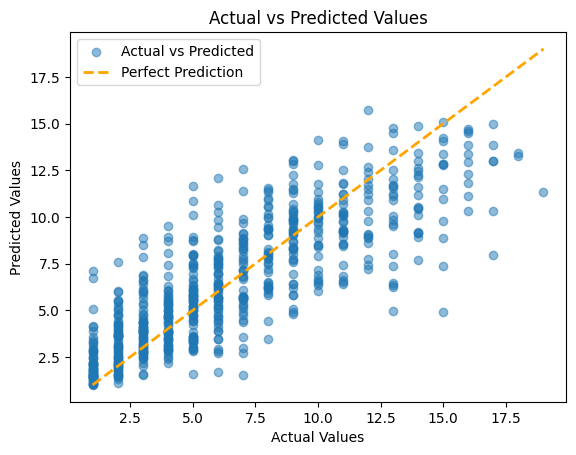

In [ ]:
plt.scatter(y_test, predictions, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linestyle='--', linewidth=2, label='Perfect Prediction')
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, predictions)
line = slope * y_test + intercept



# Confidence interval (this is a simple way to calculate it, for illustration purposes)
ci = 1.96 * std_err

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
predictlr=modelrf.predict(Predict2024)
driver_name=["Max","Perez","Ham","Russ","Lec","Saiz","yuki","Ric"]
results = zip(driver_name, predictlr)

# Iterate through the results and print the predictions for each driver
for driver, prediction in results:
    print(f"{driver}: Predicted Position - {(prediction-1)}")

Max: Predicted Position - 0.8
Perez: Predicted Position - 2.0
Ham: Predicted Position - 5.74
Russ: Predicted Position - 5.77
Lec: Predicted Position - 3.38
Saiz: Predicted Position - 11.3
yuki: Predicted Position - 11.71
Ric: Predicted Position - 6.72


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming your DataFrame is named 'df'
X = df.drop(['resultId', 'position', 'year', 'circuitRef', "name", "number", "forename", "circuitRef"], axis=1)
y = df['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize and fit Ridge Regression model
modelri = Ridge(alpha=1)  # You can adjust the regularization strength (alpha)
modelri.fit(X_train, y_train)

# Make predictions
predictions = modelri.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
print(f'Ridge Regression Mean Absolute Error: {mae}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Ridge Regression Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'Ridge Regression R^2 Score: {r2}')

Ridge Regression Mean Absolute Error: 1.925074483620264
Ridge Regression Root Mean Squared Error: 2.617953115660475
Ridge Regression R^2 Score: 0.5977818657061817


In [ ]:
predictlr=modelri.predict(Predict2024)
driver_name=["Max","Perez","Ham","Russ","Lec","Saiz","yuki","Ric"]
results = zip(driver_name, predictlr)

# Iterate through the results and print the predictions for each driver
for driver, prediction in results:
    print(f"{driver}: Predicted Position - {(prediction-1)}")

Max: Predicted Position - 1.2213650192362246
Perez: Predicted Position - 2.563746143866986
Ham: Predicted Position - 5.819090333339524
Russ: Predicted Position - 5.761620959242341
Lec: Predicted Position - 4.07713196680807
Saiz: Predicted Position - 8.10834853823237
yuki: Predicted Position - 11.75107491364841
Ric: Predicted Position - 9.409798930289089


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming your DataFrame is named 'df_after_2015'
X = df.drop(['resultId', 'position', 'year', 'circuitRef', "name", "number", "forename", "circuitRef"], axis=1)
y = df['position']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Making predictions
xgb_predictions = xgb_model.predict(X_test)

# Calculate and print evaluation metrics
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f'XGBoost Regressor Mean Absolute Error: {xgb_mae}')

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print(f'XGBoost Regressor Root Mean Squared Error: {xgb_rmse}')

xgb_r2 = r2_score(y_test, xgb_predictions)
print(f'XGBoost Regressor R-squared: {xgb_r2}')

XGBoost Regressor Mean Absolute Error: 1.657578571389119
XGBoost Regressor Root Mean Squared Error: 2.1740952139652774
XGBoost Regressor R-squared: 0.6989635736790409


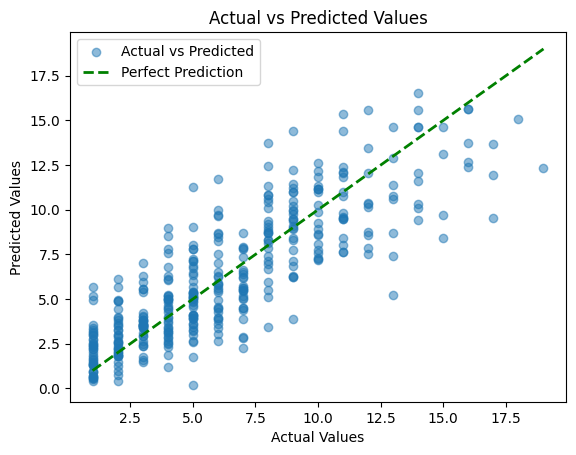

In [ ]:
plt.scatter(y_test, xgb_predictions, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', linewidth=2, label='Perfect Prediction')
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, xgb_predictions)
line = slope * y_test + intercept



# Confidence interval (this is a simple way to calculate it, for illustration purposes)
ci = 1.96 * std_err

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
predictlr=xgb_model.predict(Predict2024)
driver_name=["Max","Perez","Ham","Russ","Lec","Saiz","yuki","Ric"]
results = zip(driver_name, predictlr)

# Iterate through the results and print the predictions for each driver
for driver, prediction in results:
    print(f"{driver}: Predicted Position - {(prediction)}")

Max: Predicted Position - 1.0913370847702026
Perez: Predicted Position - 2.91914963722229
Ham: Predicted Position - 9.145760536193848
Russ: Predicted Position - 6.091320037841797
Lec: Predicted Position - 0.8984794616699219
Saiz: Predicted Position - 9.615073204040527
yuki: Predicted Position - 14.475045204162598
Ric: Predicted Position - 12.205924987792969


In [ ]:
predictlr=xgb_model.predict(Predict2024_3)
driver_name=["Max","Perez","Ham","Russ","Lec","Saiz","yuki","Ric"]
results = zip(driver_name, predictlr)

# Iterate through the results and print the predictions for each driver
for driver, prediction in results:
    print(f"{driver}: Predicted Position - {(prediction)}")

Max: Predicted Position - 1.3968393802642822
Perez: Predicted Position - 3.1688060760498047
Ham: Predicted Position - 6.86001443862915
Russ: Predicted Position - 6.228891372680664
Lec: Predicted Position - 0.9262560606002808
Saiz: Predicted Position - 7.874074935913086
yuki: Predicted Position - 9.165666580200195
Ric: Predicted Position - 11.048432350158691


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost Regressor
xgb_model = XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Use the best parameters to train the final model
final_xgb_model = XGBRegressor(**best_params)
final_xgb_model.fit(X_train, y_train)

# Make predictions with the final model
final_xgb_predictions = final_xgb_model.predict(X_test)

# Calculate and print evaluation metrics for the final model
final_xgb_mae = mean_absolute_error(y_test, final_xgb_predictions)
print(f'Final XGBoost Regressor Mean Absolute Error: {final_xgb_mae}')

final_xgb_rmse = np.sqrt(mean_squared_error(y_test, final_xgb_predictions))
print(f'Final XGBoost Regressor Root Mean Squared Error: {final_xgb_rmse}')

final_xgb_r2 = r2_score(y_test, final_xgb_predictions)
print(f'Final XGBoost Regressor R-squared: {final_xgb_r2}')


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [ ]:
predictlr=final_xgb_model.predict(Predict2024_3)
driver_name=["Max","Perez","Ham","Russ","Lec","Saiz","yuki","Ric"]
results = zip(driver_name, predictlr)

# Iterate through the results and print the predictions for each driver
for driver, prediction in results:
    print(f"{driver}: Predicted Position - {(prediction-1)}")

Max: Predicted Position - 2.153514862060547
Perez: Predicted Position - 3.899956226348877
Ham: Predicted Position - 7.111207962036133
Russ: Predicted Position - 6.7105607986450195
Lec: Predicted Position - 1.4783484935760498
Saiz: Predicted Position - 7.4496049880981445
yuki: Predicted Position - 12.914324760437012
Ric: Predicted Position - 11.22618579864502


In [ ]:
predictlr=final_xgb_model.predict(Predict2024)
driver_name=["Max","Perez","Ham","Russ","Lec","Saiz","yuki","Ric"]
results = zip(driver_name, predictlr)

# Iterate through the results and print the predictions for each driver
for driver, prediction in results:
    print(f"{driver}: Predicted Position - {(prediction-1)}")

Max: Predicted Position - 1.8454327583312988
Perez: Predicted Position - 4.105791091918945
Ham: Predicted Position - 8.93575668334961
Russ: Predicted Position - 7.610870361328125
Lec: Predicted Position - 2.6612350940704346
Saiz: Predicted Position - 9.653854370117188
yuki: Predicted Position - 15.901554107666016
Ric: Predicted Position - 12.420350074768066


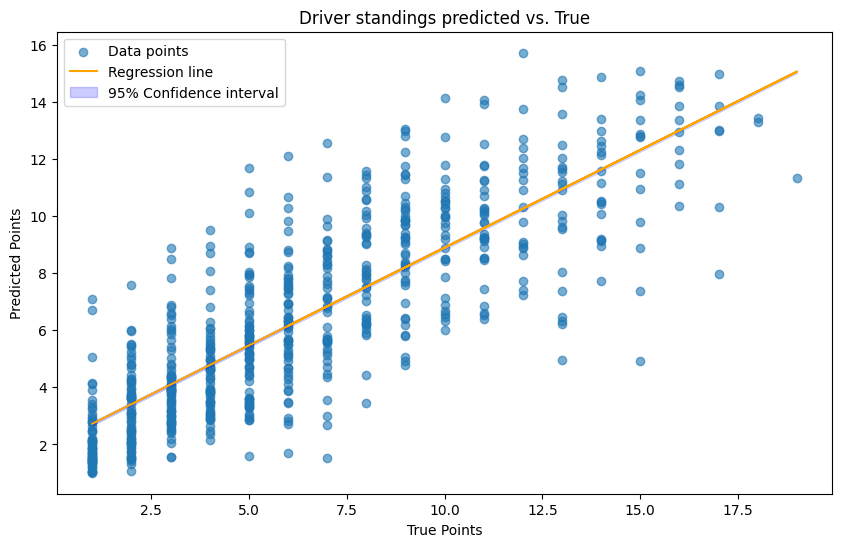

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming your DataFrame is named 'df'
# ... (your data preprocessing here)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize and fit Random Forest Regression model
modelrf = RandomForestRegressor(n_estimators=100, random_state=5)
modelrf.fit(X_train, y_train)

# Make predictions
predictions = modelrf.predict(X_test)

# Plotting Actual vs Predicted values with regression line and confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, label='Data points')

# Calculating the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, predictions)
line = slope * y_test + intercept

# Plotting the regression line
plt.plot(y_test, line, color='orange', label='Regression line')

# Confidence interval (this is a simple way to calculate it, for illustration purposes)
ci = 1.96 * std_err
plt.fill_between(y_test, line - ci, line + ci, color='b', alpha=0.2, label='95% Confidence interval')

plt.xlabel('True Points')
plt.ylabel('Predicted Points')
plt.title('Driver standings predicted vs. True')
plt.legend()
plt.show()